![Nuclio logo](https://nuclio.school/wp-content/uploads/2018/12/nucleoDS-newBlack.png)

<font color="#07" size=+2><b>David Gadyt - CIFAR-10 Classification Assignment</b></font>

# **Assignment Introduction**

## **Overview**

---



CIFAR-10 is a widely used benchmark dataset in computer vision and machine learning. It was developed by the Canadian Institute For Advanced Research (CIFAR) and consists of 60,000 32x32 color training images and 10,000 test images, each labeled with one of 10 classes. The 10 classes in CIFAR-10 are:

**Airplane, Automobile, Bird, Cat, Deer, Dog, Frog, Horse, Ship, Truck**







## **Method**

In this assignment, Keras will be utilized as the deep learning framework to train neural networks for accurately classifying the CIFAR-10 test dataset. The goal is to build a model that can recognize and differentiate between the ten different classes in the dataset, mentioned above.

To achieve this, various deep learning techniques and architectures will be employed, such as convolutional neural networks (CNNs), normalization, dropouts, Max pooling and data augmentation, to improve the model's performance and accuracy.  The improvement of the model will be incremental and 5 models in total will be provided and described.

The main goal will be to reach **80%** accuracy in the test data.

### **Steps Description:**
1. **Prepare the data**: Load and preprocess CIFAR-10 data that will be used to train, validate and test the model. The main tasks are splitting and normalizing the data, and converting it into the appropriate format for use with Keras model.

2. **Define the model architecture**: Involves specifying the number of layers, the type of each layer, the number of neurons in each layer, and any other relevant parameters.

3. **Compile the model**: Configure the model for training by specifying the optimizer, loss function, and metrics to be used.

4. **Data augmentation**: Apply data augmentation techniques to the training data, to increase the size of the dataset and to reduce overfitting.

5. **Train the model**: Train the model on the training data using the fit() method in Keras. This involves specifying the training data, the number of epochs, the batch size (the number of samples per gradient update), and any other relevant parameters.

6. **Evaluate the model**: Evaluate the performance of the model on the test data using the evaluate() method in Keras. This will return the loss and any metrics specified during the compilation step.


# **0. Libraries**

To start, let's load those libraries that we need.

In [1]:
pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.2/992.2 KB 56.0 MB/s eta 0:00:00


In [2]:
# Import and aliasing libraries

from tensorflow import keras as ks
from keras.optimizers import SGD, Adam
import visualkeras
from keras import regularizers
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
import plotly.express as px
from matplotlib import pyplot as plt
import random
import pandas as pd
import numpy as np
import time
import datetime

## **0.1 User Functions**

In [3]:
def plot_training_results(history):
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))

    # Plot the loss
    ax[0].plot(history.history['loss'], color='blue', label='train')
    ax[0].plot(history.history['val_loss'], color='red', label='val')
    ax[0].set_title('Cross Entropy Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Loss')
    ax[0].legend()

    # Plot the accuracy
    ax[1].plot(history.history['accuracy'], color='blue', label='train')
    ax[1].plot(history.history['val_accuracy'], color='red', label='val')
    ax[1].set_title('Classification Accuracy')
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Accuracy')
    ax[1].legend()

    plt.show()

# **1. Data:**

We load the CIFAR10 data from the datasets directly from the Keras libraries. These are already ready in train and test

In [4]:
cifar10 = ks.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()


170498071/170498071 [==============================] - 13s 0us/step


In [5]:
y_train_label = y_train

In [6]:
unique_values, counts = np.unique(y_train_label, return_counts=True)
print('Number of pictures:',len(y_train_label))
print("Unique values:", unique_values)

Number of pictures: 50000
Unique values: [0 1 2 3 4 5 6 7 8 9]


In [7]:
cifar10_labels = {
0:'airplane', 
1:'automobile',
2:'bird',
3:'cat',
4:'deer',
5:'dog',
6:'frog',
7:'horse',
8:'ship',
9:'truck',
}

cifar10_labels_df= pd.DataFrame(list(cifar10_labels.items()), columns=['Label_Index', 'Class_Name'])
cifar10_labels_df

,Label_Index,Class_Name
0,0,airplane
1,1,automobile
2,2,bird
3,3,cat
4,4,deer
5,5,dog
6,6,frog
7,7,horse
8,8,ship
9,9,truck


## **1.1 - Vizualize the data**


* Vizualize the distribution of colors for a random picture just for curiosity!

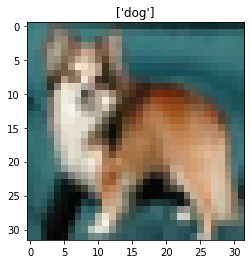

Mean of each color channel:
Red: 105.716796875
Green: 111.5771484375
Blue: 99.8564453125

Median of each color channel:
Red: 83.0
Green: 109.0
Blue: 100.0

Overall mean: 105.716796875
Overall median: 102.0


In [8]:
# Select a random image from the training set
index = random.randint(0, x_train.shape[0]-1)
image = x_train[index]
lab = y_train[index][0]
label=list(cifar10_labels_df.loc[cifar10_labels_df['Label_Index']==lab,"Class_Name"])

# Extract the red, green, and blue channels
red_channel = image[:,:,0].flatten()
green_channel = image[:,:,1].flatten()
blue_channel = image[:,:,2].flatten()

# Create table from the color channel data
data = {'Color': ['Red']*red_channel.shape[0] + ['Green']*green_channel.shape[0] + ['Blue']*blue_channel.shape[0],
        'Value': list(red_channel) + list(green_channel) + list(blue_channel)}
df = pd.DataFrame(data)

# Plot the histograms
fig = px.histogram(df, x='Value', color='Color', nbins=256, opacity=0.5,template='seaborn')
fig.update_layout(title=f'Histograms of Color Channels for Random Image (Label: {label})')

# Plot the picture
plt.imshow(image, cmap=plt.get_cmap('gray'))
plt.title(label)

# Show the plot
fig.show()
plt.show()

# Color channel labels
labels = ['Red', 'Green', 'Blue']

# Calculate mean and median for each color channel
means = []
medians = []
for channel, label in enumerate(labels):
    channel_data = image[:, :, channel].flatten()
    means.append(np.mean(channel_data))
    medians.append(np.median(channel_data))

# Calculate overall mean and median per
overall_mean = np.mean(image)
overall_median = np.median(image)

print("Mean of each color channel:")
for label, mean in zip(labels, means):
    print(f"{label}: {mean}")

print("\nMedian of each color channel:")
for label, median in zip(labels, medians):
    print(f"{label}: {median}")

print(f"\nOverall mean: {overall_mean}")
print(f"Overall median: {overall_median}")


* Calculate the overall mean and median of the data set:


In [9]:
# Concatenate the training and test data
data = np.concatenate((x_train, x_test), axis=0)

# Calculate mean and median for each color channel
means = []
medians = []
for channel in range(3):
    channel_data = data[:, :, :, channel].flatten()
    means.append(round(np.mean(channel_data)))
    medians.append(round(np.median(channel_data)))

# Calculate overall mean and median
overall_mean = round(np.mean(data))
overall_median = round(np.median(data))

print("Mean of each color channel:", means)
print("Median of each color channel:", medians)
print("Overall mean:", overall_mean)
print("Overall median:", overall_median)

Mean of each color channel: [125, 123, 114]
Median of each color channel: [123, 121, 105]
Overall mean: 121
Overall median: 117


In [10]:
x_val = x_train[-10000:]
y_val = y_train[-10000:]

x_train = x_train[:-10000]
y_train = y_train[:-10000]

* **Dataset normalization**

> The median and mean are both measures of central tendency, but they are not equivalent. In general, the mean is sensitive to outliers and extreme values in the data, while the median is not. This is because the mean is calculated as the sum of all values in the data, divided by the number of values, while the median is the middle value of the data when it is sorted.

> When normalizing the data, it is often better to use the median rather than the mean to prevent outliers from affecting the scaling. This is especially important in image classification, where outliers can occur due to extreme lighting conditions or other factors, and can have a large impact on the mean but not the median.

In [11]:

median = np.median(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-median)/(std+1e-7)
x_test = (x_test-median)/(std+1e-7)
x_val=(x_val-median)/(std+1e-7)

In [12]:
# We validate the datasets
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
print('Validation: X=%s, y=%s' % (x_val.shape, y_val.shape))

Train: X=(40000, 32, 32, 3), y=(40000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)
Validation: X=(10000, 32, 32, 3), y=(10000, 1)


# **2. Model - 01:**

In [13]:
# Model_01 Network Architecture
model_01 = ks.Sequential()

model_01.add(ks.layers.Flatten(input_shape=(32,32,3)))

model_01.add(ks.layers.Dense(100, activation='relu'))
model_01.add(ks.layers.Dense(50, activation='relu'))

model_01.add(ks.layers.Dense(10, activation='softmax'))

In [14]:
# Mode_01 Summary
model_01.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 100)               307300    
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
Total params: 312,860
Trainable params: 312,860
Non-trainable params: 0
_________________________________________________________________


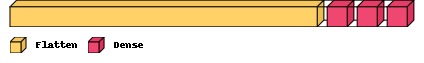

In [15]:
visualkeras.layered_view(model_01, legend=True)

In [16]:
# Model_01 Compilation
model_01.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [17]:
# Model_01 Training Dataset
t = time.perf_counter()
history_01 = model_01.fit(x_train, y_train, 
                          epochs=10,
                          use_multiprocessing=False, 
                          batch_size= 32, 
                          validation_data=(x_val, y_val))

Epoch 1/10
1250/1250 [==============================] - 9s 4ms/step - loss: 1.8156 - accuracy: 0.3656 - val_loss: 1.6521 - val_accuracy: 0.4146
Epoch 2/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.5661 - accuracy: 0.4453 - val_loss: 1.5827 - val_accuracy: 0.4401
Epoch 3/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.4661 - accuracy: 0.4801 - val_loss: 1.5420 - val_accuracy: 0.4624
Epoch 4/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.4000 - accuracy: 0.5030 - val_loss: 1.5559 - val_accuracy: 0.4521
Epoch 5/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.3476 - accuracy: 0.5228 - val_loss: 1.4945 - val_accuracy: 0.4781
Epoch 6/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.2989 - accuracy: 0.5390 - val_loss: 1.4866 - val_accuracy: 0.4805
Epoch 7/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.2538 - accuracy: 0.5520 - val_loss: 1.4685 - val_accuracy:

In [18]:
elapsed_time_01 = datetime.timedelta(seconds=(time.perf_counter() - t))
print('Training time:', elapsed_time_01)

Training time: 0:00:50.170010


In [19]:
print('Model 01  Accuracy Results:\n')
# Print the training and validation results
print("Training:", round(history_01.history['accuracy'][-1]*100,2))
print("Validation:", round(history_01.history['val_accuracy'][-1]*100,2))
# Model_01 Results Evaluation
_, acc_01 = model_01.evaluate(x_test, y_test, verbose=0)
print('Test:', round((acc_01 * 100),2))

Model 01  Accuracy Results:

Training: 59.28
Validation: 49.61
Test: 49.68


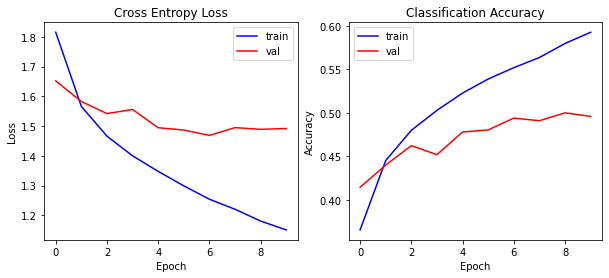

In [20]:
plot_training_results(history_01)

**Result Analysis:**

The model's performance is unsatisfactory, as indicated by the low training accuracy, which suggests that the model did not learn enough from the training data. As expected, this lack of learning is reflected in the poor evaluation score. To improve the model's performance, we need to first focus on improving the accuracy on the training set to ensure that the model is able to learn from the data effectively.

# **3. Model - 02:**

In [21]:
## Model_02 Network Architecture
model_02 = ks.Sequential()

model_02.add(ks.layers.Conv2D(30, (3, 3), activation='relu',padding='same', input_shape=(32,32,3)))
model_02.add(ks.layers.MaxPooling2D((2, 2)))
model_02.add(ks.layers.Conv2D(30, (3, 3), activation='relu',padding='same'))
model_02.add(ks.layers.MaxPooling2D((2, 2)))
model_02.add(ks.layers.Conv2D(60, (3, 3), activation='relu',padding='same'))
model_02.add(ks.layers.MaxPooling2D((2, 2)))
model_02.add(ks.layers.Conv2D(60, (3, 3), activation='relu',padding='same'))
model_02.add(ks.layers.MaxPooling2D((2, 2)))


model_02.add(ks.layers.Flatten())

model_02.add(ks.layers.Dense(500, activation='relu'))
model_02.add(ks.layers.Dense(250, activation='relu'))
model_02.add(ks.layers.Dense(50, activation='relu'))

model_02.add(ks.layers.Dense(10, activation='softmax'))



In [22]:
# Mode_02 Summary
model_02.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 30)        840       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 30)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 30)        8130      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 30)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 60)          16260     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 60)        

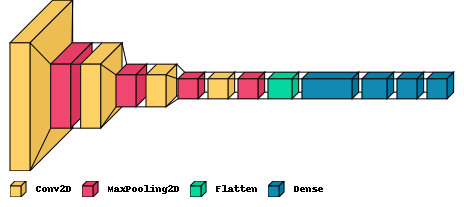

In [23]:
visualkeras.layered_view(model_02, legend=True)

In [24]:
# Model_02 Compilation
model_02.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [25]:
# Model_02 Training Dataset
t = time.perf_counter()
history_02 = model_02.fit(x_train, y_train,
                          epochs=20, 
                          batch_size= 32, 
                          validation_data=(x_val, y_val),
                          callbacks=[ks.callbacks.EarlyStopping(monitor='val_loss',patience=10)],
                          use_multiprocessing=False)

Epoch 1/20
1250/1250 [==============================] - 19s 6ms/step - loss: 1.4884 - accuracy: 0.4542 - val_loss: 1.1837 - val_accuracy: 0.5692
Epoch 2/20
1250/1250 [==============================] - 8s 6ms/step - loss: 1.0725 - accuracy: 0.6185 - val_loss: 1.0297 - val_accuracy: 0.6395
Epoch 3/20
1250/1250 [==============================] - 12s 10ms/step - loss: 0.8964 - accuracy: 0.6840 - val_loss: 0.9241 - val_accuracy: 0.6759
Epoch 4/20
1250/1250 [==============================] - 9s 7ms/step - loss: 0.7852 - accuracy: 0.7229 - val_loss: 0.8756 - val_accuracy: 0.6992
Epoch 5/20
1250/1250 [==============================] - 11s 9ms/step - loss: 0.6967 - accuracy: 0.7544 - val_loss: 0.8891 - val_accuracy: 0.7016
Epoch 6/20
1250/1250 [==============================] - 10s 8ms/step - loss: 0.6255 - accuracy: 0.7815 - val_loss: 0.8280 - val_accuracy: 0.7226
Epoch 7/20
1250/1250 [==============================] - 8s 6ms/step - loss: 0.5664 - accuracy: 0.8024 - val_loss: 0.8326 - val_accu

In [26]:
elapsed_time_02 = datetime.timedelta(seconds=(time.perf_counter() - t))
print('Training time:', elapsed_time_02)

Training time: 0:02:32.774833


In [27]:
print('Model 02  Accuracy Results:\n')
# Print the training and validation results
print("Training:", round(history_02.history['accuracy'][-1]*100,2))
print("Validation:", round(history_02.history['val_accuracy'][-1]*100,2))
# Model_01 Results Evaluation
_, acc_02 = model_02.evaluate(x_test, y_test, verbose=0)
print('Test:', round((acc_02 * 100),2))

Model 02  Accuracy Results:

Training: 91.18
Validation: 72.64
Test: 72.44


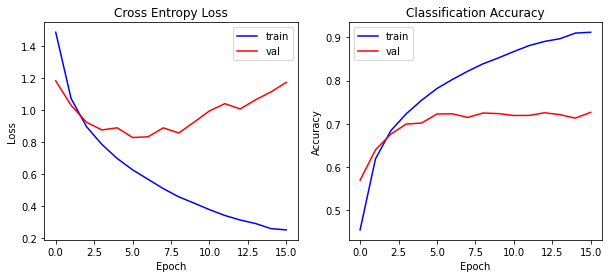

In [28]:
# Model_02 Plot results
plot_training_results(history_02)

**Result Analysis:**

The model's performance has improved significantly, as the training accuracy has increased. However, it is evident that the model is overfitting the data and not generalizing well, as indicated by the poor evaluation score. In order to improve the model's performance, it is crucial to focus on enhancing data generalization, so that the model can better learn to generalize patterns from the training data to unseen data.

# **4. Model - 03:**

In [29]:
## Model_03 Network Architecture

model_03 = ks.Sequential()

model_03.add(ks.layers.Conv2D(32, (3, 3), activation='relu',padding='same', input_shape=(32,32,3)))
model_03.add(ks.layers.Conv2D(32, (3, 3), activation='relu',padding='same'))
model_03.add(ks.layers.MaxPooling2D((2,2)))

model_03.add(ks.layers.Conv2D(64, (3, 3), activation='relu',padding='same'))
model_03.add(ks.layers.Conv2D(64, (3, 3), activation='relu',padding='same'))
model_03.add(ks.layers.MaxPooling2D((3,3)))
model_03.add(ks.layers.Dropout(0.20))

model_03.add(ks.layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
model_03.add(ks.layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
model_03.add(ks.layers.MaxPooling2D((2,2)))

model_03.add(ks.layers.Flatten())

model_03.add(ks.layers.Dense(935, activation='relu'))
model_03.add(ks.layers.BatchNormalization())
model_03.add(ks.layers.Dropout(0.20))

model_03.add(ks.layers.Dense(499, activation='relu'))
model_03.add(ks.layers.BatchNormalization())

model_03.add(ks.layers.Dense(142, activation='relu'))
model_03.add(ks.layers.BatchNormalization())
model_03.add(ks.layers.Dropout(0.20))

model_03.add(ks.layers.Dense(67, activation='relu'))
model_03.add(ks.layers.BatchNormalization())

model_03.add(ks.layers.Dense(10, activation='softmax'))

In [30]:
# Mode_03 Summary
model_03.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                  

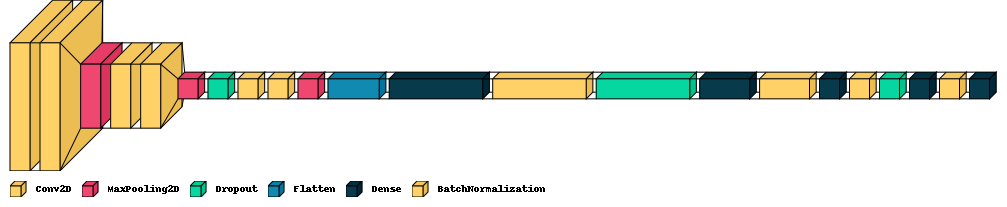

In [31]:
visualkeras.layered_view(model_03, legend=True)


In [32]:
# Model_03 Compilation
model_03.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [33]:
# Model_03 Training Dataset
t = time.perf_counter()
history_03 = model_03.fit(x_train, y_train,
                          epochs=100,
                          batch_size= 32,
                          validation_data=(x_val, y_val),
                          callbacks=[ks.callbacks.EarlyStopping(monitor='val_loss',patience=15)],
                          use_multiprocessing=False)

Epoch 1/50
1250/1250 [==============================] - 13s 9ms/step - loss: 1.5920 - accuracy: 0.4219 - val_loss: 1.2881 - val_accuracy: 0.5322
Epoch 2/50
1250/1250 [==============================] - 10s 8ms/step - loss: 1.1317 - accuracy: 0.5975 - val_loss: 1.0610 - val_accuracy: 0.6335
Epoch 3/50
1250/1250 [==============================] - 10s 8ms/step - loss: 0.9495 - accuracy: 0.6676 - val_loss: 0.8293 - val_accuracy: 0.7100
Epoch 4/50
1250/1250 [==============================] - 11s 8ms/step - loss: 0.8311 - accuracy: 0.7133 - val_loss: 0.8533 - val_accuracy: 0.7069
Epoch 5/50
1250/1250 [==============================] - 11s 9ms/step - loss: 0.7392 - accuracy: 0.7465 - val_loss: 0.7070 - val_accuracy: 0.7582
Epoch 6/50
1250/1250 [==============================] - 10s 8ms/step - loss: 0.6690 - accuracy: 0.7693 - val_loss: 0.7352 - val_accuracy: 0.7440
Epoch 7/50
1250/1250 [==============================] - 10s 8ms/step - loss: 0.6072 - accuracy: 0.7930 - val_loss: 0.6157 - val_ac

In [34]:
elapsed_time_03 = datetime.timedelta(seconds=(time.perf_counter() - t))
print('Training time:', elapsed_time_03)

Training time: 0:04:44.025212


In [35]:
print('Model 03  Accuracy Results:\n')
# Print the training and validation results
print("Training:", round(history_03.history['accuracy'][-1]*100,2))
print("Validation:", round(history_03.history['val_accuracy'][-1]*100,2))
# Model_01 Results Evaluation
_, acc_03 = model_03.evaluate(x_test, y_test, verbose=0)
print('Test:', round((acc_03 * 100),2))

Model 03  Accuracy Results:

Training: 94.23
Validation: 81.82
Test: 81.33


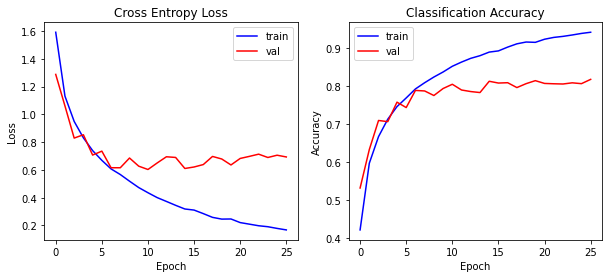

In [36]:
# Model_03 Plot results
plot_training_results(history_03)

**Result Analysis:**

**The objective of the assignment has been achieved!**

The training accuracy has slightly increased compared to the previous model, reaching > 90%. However, the evaluation score suggests that the model still has room for improvement in terms of generalization. One of the possible reasons for this is the limited number of training samples, which can hinder the model's ability to learn and generalize patterns. Therefore, to further enhance the model's performance, it would be beneficial to increase the amount and diversity of training data, which can provide the model with more examples to learn from and improve its generalization. Moreover, applying regularization techniques, such as dropout or weight decay, can also be effective in reducing overfitting and improving generalization.

# **5. Model - 04:**

In [37]:
# Define a learning schedule to be used for call back

def lr_schedule(epoch):
    lrate = 0.0015
    if epoch > 50:
        lrate = 0.0005
    if epoch > 75:
        lrate = 0.0003
    return lrate

When using categorical_crossentropy in Keras, we need to ensure that our targets are in the one-hot encoded format, and we can use np_utils.to_categorical to perform this conversion.

In [38]:
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)
y_val = np_utils.to_categorical(y_val,10)


In [39]:
weight_decay = 1e-4

In [40]:
## Model_04 Network Architecture

model_04 = ks.Sequential()

model_04.add(ks.layers.Conv2D(30, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(weight_decay), input_shape=(32,32,3)))
model_04.add(ks.layers.BatchNormalization())
model_04.add(ks.layers.Conv2D(30, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model_04.add(ks.layers.BatchNormalization())
model_04.add(ks.layers.MaxPooling2D((2,2)))
model_04.add(ks.layers.Dropout(0.20))

model_04.add(ks.layers.Conv2D(60, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model_04.add(ks.layers.BatchNormalization())
model_04.add(ks.layers.Conv2D(60, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model_04.add(ks.layers.BatchNormalization())
model_04.add(ks.layers.MaxPooling2D((3,3)))
model_04.add(ks.layers.Dropout(0.30))

model_04.add(ks.layers.Conv2D(128, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model_04.add(ks.layers.BatchNormalization())
model_04.add(ks.layers.Conv2D(128, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model_04.add(ks.layers.BatchNormalization())
model_04.add(ks.layers.MaxPooling2D((3,3)))
model_04.add(ks.layers.Dropout(0.40))

model_04.add(ks.layers.Flatten())

model_04.add(ks.layers.Dense(10, activation='softmax'))

In [41]:
# Mode_04 Summary
model_04.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 32, 32, 30)        840       
                                                                 
 batch_normalization_4 (Batc  (None, 32, 32, 30)       120       
 hNormalization)                                                 
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 30)        8130      
                                                                 
 batch_normalization_5 (Batc  (None, 32, 32, 30)       120       
 hNormalization)                                                 
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 16, 16, 30)       0         
 2D)                                                             
                                                      

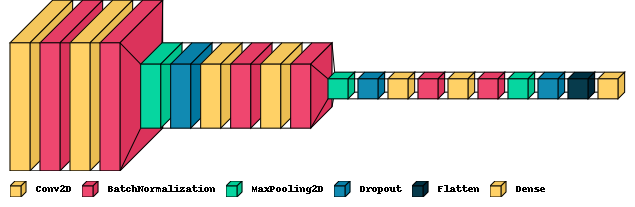

In [42]:
visualkeras.layered_view(model_04, legend=True)


In [43]:
#data augmentation
datagen = ImageDataGenerator(
    rotation_range=13,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(x_train)

In [44]:
opt_rms = ks.optimizers.RMSprop(learning_rate=0.001,weight_decay=1e-5)

In [45]:
# Model_04 Compilation
model_04.compile(optimizer=opt_rms, loss='categorical_crossentropy',metrics=['accuracy'])

In [46]:
history_04=model_04.fit(datagen.flow(x_train, y_train, batch_size=64),
                        steps_per_epoch=len(x_train)/ 64,epochs=100,
                        validation_data=(x_val,y_val),
                        callbacks=[LearningRateScheduler(lr_schedule)],use_multiprocessing=False)

Epoch 1/100
625/625 [==============================] - 30s 41ms/step - loss: 1.6869 - accuracy: 0.4340 - val_loss: 1.3257 - val_accuracy: 0.5500 - lr: 0.0015
Epoch 2/100
625/625 [==============================] - 27s 43ms/step - loss: 1.2148 - accuracy: 0.5916 - val_loss: 1.1016 - val_accuracy: 0.6463 - lr: 0.0015
Epoch 3/100
625/625 [==============================] - 26s 41ms/step - loss: 1.0729 - accuracy: 0.6552 - val_loss: 1.0601 - val_accuracy: 0.6775 - lr: 0.0015
Epoch 4/100
625/625 [==============================] - 25s 40ms/step - loss: 0.9914 - accuracy: 0.6894 - val_loss: 0.8565 - val_accuracy: 0.7363 - lr: 0.0015
Epoch 5/100
625/625 [==============================] - 25s 40ms/step - loss: 0.9488 - accuracy: 0.7084 - val_loss: 0.8231 - val_accuracy: 0.7526 - lr: 0.0015
Epoch 6/100
625/625 [==============================] - 25s 40ms/step - loss: 0.9196 - accuracy: 0.7240 - val_loss: 0.8594 - val_accuracy: 0.7533 - lr: 0.0015
Epoch 7/100
625/625 [==============================]

In [47]:
elapsed_time_04 = datetime.timedelta(seconds=(time.perf_counter() - t))
print('Training time:', elapsed_time_04)

Training time: 0:48:11.724101


In [48]:
print('Model 04  Accuracy Results:\n')
# Print the training and validation results
print("Training:", round(history_04.history['accuracy'][-1]*100,2))
print("Validation:", round(history_04.history['val_accuracy'][-1]*100,2))
# Model_01 Results Evaluation
_, acc_04 = model_04.evaluate(x_test, y_test, verbose=0)
print('Test:', round((acc_04 * 100),2))

Model 04  Accuracy Results:

Training: 87.73
Validation: 86.74
Test: 86.16


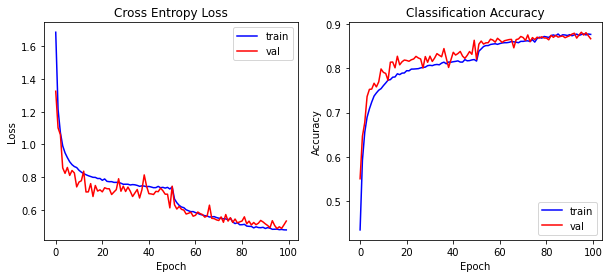

In [49]:
# Model_04 Plot results
plot_training_results(history_04)

**Result Analysis:**

This model incorporates several techniques, including data augmentation and regularization, to enhance its performance on the evaluation dataset. As a result, the evaluation score improved by approximately 5%, demonstrating that the model can generalize better to new data. Although the training score was less accurate than before, this trade-off is beneficial. 

For the next iteration, a few additional experiments could be performed to further improve the model's performance. For instance, increasing the number of epochs could allow the model to learn more complex representations and achieve a better accuracy score. Additionally, trying out the Adam optimizer instead of RMSprop could be worthwhile to investigate if it yields better results. The other small changes are related to data augmentation arguments and the learning rate scheduler.

# **6. Model - 05:**

In [79]:
# Define a learning schedule to be used for call back

def lr_schedule(epoch):
    lrate = 0.0015
    if epoch > 50:
        lrate = 0.0005
    if epoch > 75:
        lrate = 0.0003
    if epoch > 100:
        lrate = 0.0001
    return lrate

In [80]:
weight_decay = 1e-4

In [81]:
## Model_05 Network Architecture

Model_05 = ks.Sequential()

Model_05.add(ks.layers.Conv2D(32, (3, 3), activation='relu',padding='same', input_shape=(32,32,3)))
Model_05.add(ks.layers.BatchNormalization())
Model_05.add(ks.layers.Conv2D(32, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
Model_05.add(ks.layers.BatchNormalization())
Model_05.add(ks.layers.Conv2D(32, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
Model_05.add(ks.layers.BatchNormalization())
Model_05.add(ks.layers.MaxPooling2D((2,2)))
Model_05.add(ks.layers.Dropout(0.2))

Model_05.add(ks.layers.Conv2D(64, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
Model_05.add(ks.layers.BatchNormalization())
Model_05.add(ks.layers.Conv2D(64, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
Model_05.add(ks.layers.BatchNormalization())
Model_05.add(ks.layers.Conv2D(64, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
Model_05.add(ks.layers.BatchNormalization())
Model_05.add(ks.layers.MaxPooling2D((3,3)))
Model_05.add(ks.layers.Dropout(0.30))

Model_05.add(ks.layers.Conv2D(128, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
Model_05.add(ks.layers.BatchNormalization())
Model_05.add(ks.layers.Conv2D(128, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
Model_05.add(ks.layers.BatchNormalization())
Model_05.add(ks.layers.Conv2D(128, (3, 3), activation='relu',padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
Model_05.add(ks.layers.BatchNormalization())
Model_05.add(ks.layers.MaxPooling2D((3,3)))
Model_05.add(ks.layers.Dropout(0.40))

Model_05.add(ks.layers.Flatten())

Model_05.add(ks.layers.Dense(10, activation='softmax'))

In [82]:
# Mode_05 Summary
Model_05.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_54 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_53 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_55 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_54 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_56 (Bat  (None, 32, 32, 32)      

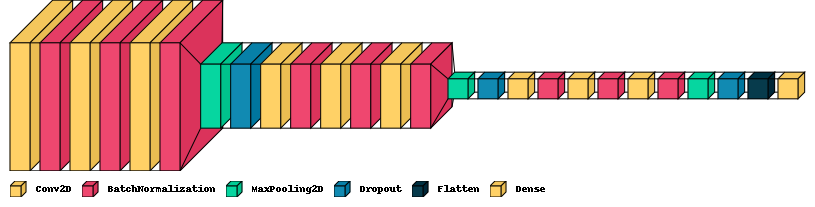

In [83]:
visualkeras.layered_view(Model_05, legend=True)


In [84]:
# Model_05 Compilation
Model_05.compile(optimizer=Adam(0.001), loss='categorical_crossentropy',metrics=['accuracy'])

In [85]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.05,
    height_shift_range=0.05,
    horizontal_flip=True)


datagen.fit(x_train) # generate augmentations based on x_train

In [86]:
history_05= Model_05.fit(datagen.flow(x_train, y_train,shuffle=False, batch_size=64),
                        steps_per_epoch=len(x_train)/ 64,epochs=150,
                        validation_data=(x_val,y_val),
                        callbacks=[LearningRateScheduler(lr_schedule)],
                        use_multiprocessing=False)

Epoch 1/150
625/625 [==============================] - 27s 41ms/step - loss: 1.7219 - accuracy: 0.4172 - val_loss: 1.3989 - val_accuracy: 0.5301 - lr: 0.0015
Epoch 2/150
625/625 [==============================] - 25s 40ms/step - loss: 1.2746 - accuracy: 0.5717 - val_loss: 1.1916 - val_accuracy: 0.6200 - lr: 0.0015
Epoch 3/150
625/625 [==============================] - 25s 40ms/step - loss: 1.0831 - accuracy: 0.6500 - val_loss: 1.0495 - val_accuracy: 0.6806 - lr: 0.0015
Epoch 4/150
625/625 [==============================] - 25s 40ms/step - loss: 0.9727 - accuracy: 0.6958 - val_loss: 0.9313 - val_accuracy: 0.7163 - lr: 0.0015
Epoch 5/150
625/625 [==============================] - 25s 40ms/step - loss: 0.9102 - accuracy: 0.7248 - val_loss: 0.8156 - val_accuracy: 0.7510 - lr: 0.0015
Epoch 6/150
625/625 [==============================] - 26s 42ms/step - loss: 0.8791 - accuracy: 0.7423 - val_loss: 0.8239 - val_accuracy: 0.7631 - lr: 0.0015
Epoch 7/150
625/625 [==============================]

In [87]:
elapsed_time_05 = datetime.timedelta(seconds=(time.perf_counter() - t))
print('Training time:', elapsed_time_04)

Training time: 0:48:11.724101


In [88]:
print('Model 05  Accuracy Results:\n')
# Print the training and validation results
print("Training:", round(history_05.history['accuracy'][-1]*100,2))
print("Validation:", round(history_05.history['val_accuracy'][-1]*100,2))
# Model_01 Results Evaluation
_, acc_05 = Model_05.evaluate(x_test, y_test, verbose=0,batch_size=128)
print('Test:', round((acc_05 * 100),2))

Model 05  Accuracy Results:

Training: 96.1
Validation: 90.8
Test: 90.14


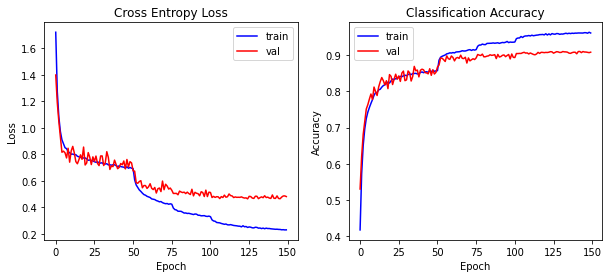

In [89]:
# Model_05 Plot results
plot_training_results(history_05)

**Result Analysis:**

Great result!


# **7. Overall Results Summary:**

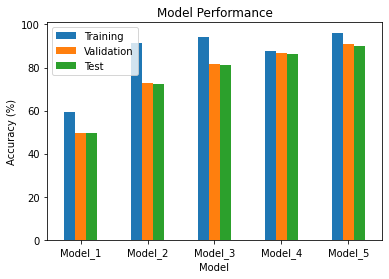

,Training,Validation,Test
Model,,,
Model_1,59.28,49.61,49.68
Model_2,91.18,72.64,72.44
Model_3,94.23,81.82,81.33
Model_4,87.73,86.74,86.16
Model_5,96.10,90.80,90.14


In [90]:
histories = [history_01, history_02, history_03, history_04, history_05]
test_results = [acc_01,acc_02,acc_03,acc_04,acc_05]
results_dict = {'Model': [], 'Training': [], 'Validation': [], 'Test': []}

for i, model in enumerate([model_01, model_02, model_03, model_04, Model_05]):
  
    # Training and validation accuracy
    train_acc = round(histories[i].history['accuracy'][-1] * 100, 2)
    val_acc = round(histories[i].history['val_accuracy'][-1] * 100, 2)
    test_acc=round(test_results[i]*100,2)
    # Test accuracy
    # Add results to dictionary
    results_dict['Model'].append(f'Model_{i+1}')
    results_dict['Training'].append(train_acc)
    results_dict['Validation'].append(val_acc)
    results_dict['Test'].append(test_acc)

# Create DataFrame
df = pd.DataFrame(results_dict)

# Set the Model column as the index
df.set_index('Model', inplace=True)

# Create a bar plot
ax = df.plot(kind='bar', rot=0)

# Add labels and title
ax.set_ylabel('Accuracy (%)')
ax.set_title('Model Performance')
ax.legend(['Training', 'Validation', 'Test'])

# Show the plot
plt.show()
display(df)

### **Performance Overview**

In [122]:
def plot_training_results(histories):
    fig, ax = plt.subplots(1, 3, figsize=(15, 4))

    for i, history in enumerate(histories):
        # Plot the accuracy
        ax[i].plot(history.history['accuracy'], color='blue', label='train')
        ax[i].plot(history.history['val_accuracy'], color='red', label='val')
        ax[i].set_title('Model {} Accuracy'.format(i+3))
        ax[i].set_xlabel('Epoch')
        ax[i].set_ylabel('Accuracy')
        ax[i].legend()

    plt.show()

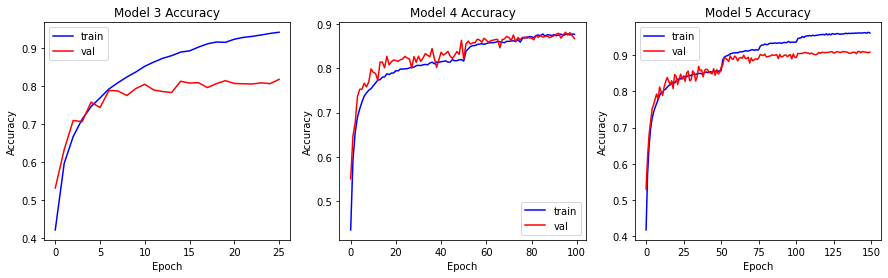

In [123]:
histories = [history_03, history_04, history_05]
plot_training_results(histories)

### **Summary Results**


Based on the on the summary table above, we can make the following observations:

**Model 1** has the lowest training, validation, and test accuracy. The model is underfitting and not able to learn the patterns in the data. 

Model 1 is a simple model with a few hidden layers, using the Adam optimizer, sparse_categorical_crossentropy loss, and accuracy metric. Trained for 10 epochs with a batch size of 32.


**Model 2** has a high training accuracy, but a lower validation and test accuracy, suggesting that it is overfitting the training data to some extent. This is due to the model not having enough regularization. 

Model 2 is an improved model that includes convolutional and max pooling layers in addition to the hidden layers. Trained for 20 epochs with early stopping callback to avoid overfitting. Otherwise, same as Model 01.

**Model 3** has high training, validation, and test accuracy, suggesting that it is performing well and able to generalize to new data. This model fits the objective of the assignment since the test result is above 80%.

Model 3 is an extension of Model 02 with the addition of batch normalization and dropout layers. The optimizer is changed to Adam with a pre defined learning rate, and the number of epochs is increased to 100.

**Model 4** has a lower training accuracy and relatively high validation accuracy when compared to Model 3, but a slightly higher test accuracy.

Model 4 incorporates several techniques to address the issue of overfitting and improve training efficiency. Specifically, it uses kernel regularization L2 and data augmentation to reduce overfitting, while the RMSprop optimizer ( replace the Adam in Model 3) and the steps_per_epoch parameter accelerate the training process. Moreover, the introduction of a learning scheduler that updates at predetermined intervals is crucial in improving the model's performance gradually, as the model struggled to improve without this technique.

**Model 5** has the highest training accuracy and highest validation and test accuracy, suggesting that it is performing very well and able to generalize well to new data. 

In Model 5, the learning scheduler is updated with additional levels, and the number of epochs is increased to facilitate better learning. The model architecture remains unchanged compared to Model 4, while the optimizer is switched back to Adam that seems to be a better parameter.

Finally, we can draw the following lessons:

The choice of model architecture, optimizer, loss function, regularization techniques, and training hyperparameters can have a significant impact on the performance of a deep learning model.

Underfitting occurs when a model is too simple to capture the patterns in the data, while overfitting occurs when a model is too complex and captures noise in the training data, leading to poor generalization to new data.

Regularization techniques such as dropout, batch normalization, kernel regularization, and data augmentation can help to prevent overfitting by forcing the model to improve generalization.

Early stopping and learning rate schedules are effective ways to prevent overfitting and improve accuracy.

Increasing the number of epochs and using more complex models can improve the model's performance, but also increase the risk of overfitting, hence the need for regularization techniques.

Model 4 and Model 5 achieve high accuracy on the test set, indicating that they are able to generalize well to new data.

# **8. We save the model for future evaluations**

Go changing the names of the file to save the various projects.
Here we save it in "local", but remember that the ideal is that you save it in Google Drive (you have to mount the unit, set the path and save the .h5 model there)

In [ ]:
Model_05.save('cifar10_base_model.h5')